# SciPy Library!

Notes from Mr. P Solver's SciPy tutorial among other tutorials on YouTube.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Curve Fitting

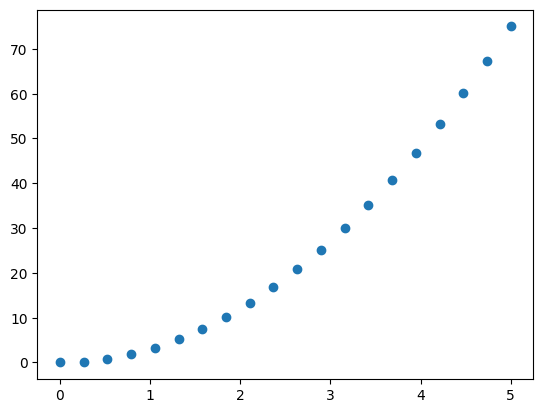

In [2]:
from scipy.optimize import curve_fit

x = np.linspace(0, 5, 20)
y1 = 3*x**2
plt.plot(x, y1, 'o')
plt.show()

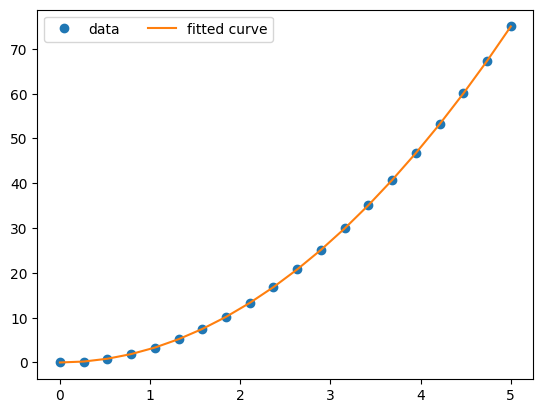

In [ ]:
def func(x, a, b):
    return a*x**2 + b

popt, pcov = curve_fit(func, x, y1, p0 = (3, 0)) # p0 represents initial guesses.
# curve_fit returns 2 arrays: popt and pcov. popt represents the best-fit parameters while pcov represents the estimated error on the parameters.

a, b = popt # Each element in the popt array corresponds to the variable. popt[0] corresponds with a in this example.

t = np.linspace(0, 5, 20)
y2 = func(x, a, b)
plt.plot(t, y1, 'o', label = 'data')
plt.plot(t, y2, label = 'fitted curve')
plt.legend(loc = 'upper left', ncol = 2)
plt.show()

In [12]:
popt

array([3., 0.])

In [11]:
np.sqrt(np.diag(pcov))

array([0., 0.])

# Optimization

In [3]:
from scipy.optimize import minimize

def f(x):
    return x**2 - 4*x + 4

res = minimize(f, 2) # 2 is the initial guess.
round(float(res.x[0]), 0) # Object res contains lots of information. 
# x is an array that has information about the minimum so do .x[0] as shown. Then, convert it to a float or else you'll get an np.float64 array.

2.0

Minimize $f(x, y) = (x - 1)^2 + (y - 2.5)^2$ subject to 
- $x - 2y + 2 \ge 0$
- $-x - 2y + 6 \ge 0$
- $-x + 2y + 2 \ge 0$
- $x \ge 0$
- $y \ge 0$

In [19]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2 # x will be a vector with x and y as its elements.
cns = ({'type': 'ineq', 'fun': lambda x: x[0] - 2*x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2*x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2*x[1] + 2})
# Constraints must be a sequence of dictionaries. Each one has the fields: type (eq or ineq), fun for function defining the constraint, and more.

bnds = ((0, None), (0, None)) # Bounds of x and y. "Sequence of (min, max) pairs for each element in x. None is used to specify no bound." 

res = minimize(f, (2, 3), bounds = bnds, constraints = cns) # Tuple (2, 3) is your initial guess. 
print(f'({float(res.x[0]):.2f}, {float(res.x[1]):.2f})')

(1.40, 1.70)


In [29]:
func = lambda x: x[0]**2 * x[1]
cnsts = ({'type': 'eq', 'fun': lambda x: x[0]**2 + x[1]**2 - 1})

res = minimize(func, (1, 0), constraints = cnsts)
print(f'({res.x[0]:.2f}, {res.x[1]:.2f})')

(0.82, -0.58)


# Interpolation

Interpolation estimates the value of a function between points.

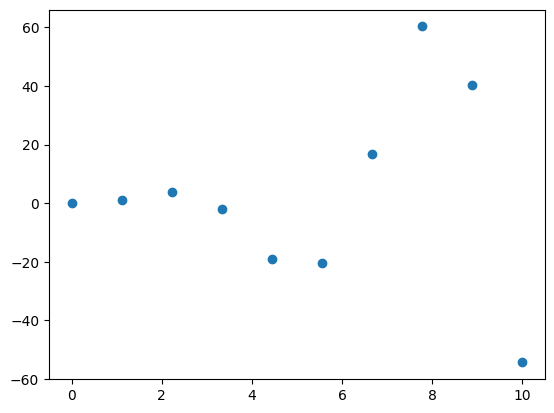

In [76]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x, y)
plt.show()

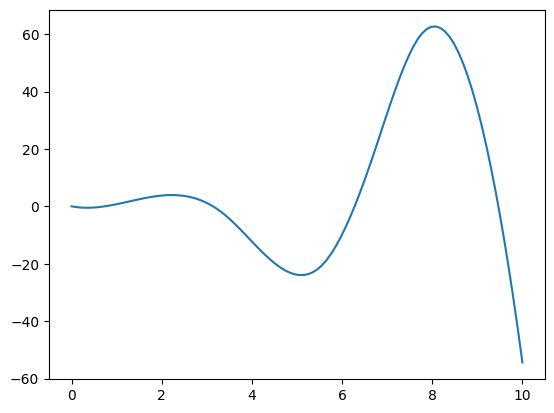

In [ ]:
from scipy.interpolate import interp1d

f = interp1d(x, y, kind = 'cubic') # cubic is a smooth kind of curve for interpolation.
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

plt.plot(x_dense, y_dense)

# Integration

Evaluate this definite integral: $$\int_{0}^{1}x^2\sin(x)e^{-x}dx$$

In [ ]:
from scipy.integrate import quad

f = lambda x: x**2 * np.sin(x) * np.exp(-x)
integral, error = quad(f, 0, 1)
integral

0.10246777930717413

Evaluate this double integral: $$\int_{0}^{1}\int_{-x}^{x^2} \sin(x + y^2) dydx$$

In [ ]:
from scipy.integrate import dblquad

integrand = lambda y, x: np.sin(x + y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, error = dblquad(integrand, 0, 1, lwr_y, upr_y) # Outer bounds of 0 and 1 go first in dblquad().
integral

0.590090324408853

# Differential Equations

Air Friction while falling: $v^{'}-\alpha v^2 + \beta = 0 \quad v(0)=0$

With algebra, $v^{'} = \alpha v^2 - \beta$

If $\alpha = 4$ and $\beta = 5$:

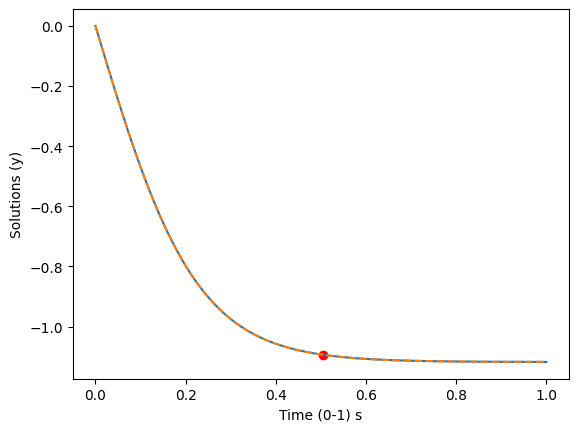

In [9]:
# With odeint() and solve_ivp()
from scipy.integrate import odeint, solve_ivp

def dvdt(t, v):
    return 4*v**2 - 5
v0 = 0

t = np.linspace(0, 1, 100)
sols1 = odeint(dvdt, y0 = v0, t = t, tfirst = True)
sols2 = solve_ivp(dvdt, t_span = (0, t[-1]), y0 = [v0], t_eval = t)

plt.plot(t, sols1)
plt.plot(sols2.t, sols2.y.ravel(), '--') # NumPy's ravel() reduces arrays to 1 dimension
plt.scatter(sols2.t[50], sols2.y.ravel()[50], color = 'red')
plt.xlabel('Time (0-1) s')
plt.ylabel('Solutions (y)')
plt.show()

Coupled First Order ODEs
- $y_1^{'} = y_1 + y_2^{2} + 3x \quad y_1(0) = 0$
- $y_2^{'} = 3y_1 + y_2^{3} - \cos(x) \quad y_2(0) = 0$

Letting $S = (y_1, y_2)$, we need to write a function that returns 
$\frac{dS}{dx} = (\frac{dy_1}{dx}, \frac{dy_2}{dx})$. The function can take $S = (y_1, y_2)$ and $x$. This is like before but in vector format.

$\vec{S} = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}$ -> $\frac{d\vec{S}}{dx} = \vec{f}(x, \vec{S})
= \vec{f}(x, \vec{y_1}, \vec{y_2}) = \begin{bmatrix} y_1^{'} \\ y_2^{'} \end{bmatrix}
= \begin{bmatrix} y_1 + y_2^{2} + 3x \\ 3y_1 + y_2^{3} - \cos(x) \end{bmatrix}$

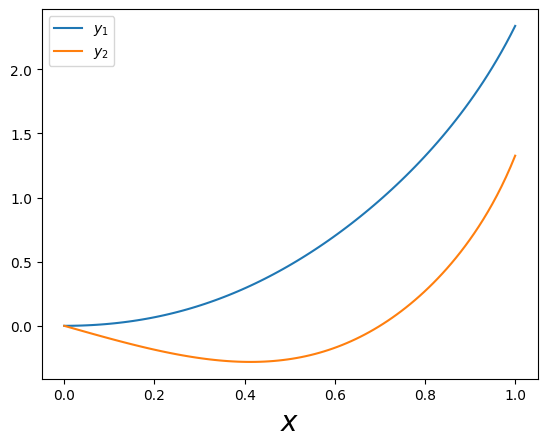

In [77]:
def dSdx(x, S):
    y1, y2 = S
    return [y1 + y2**2 + 3*x, 3*y1 + y2**3 - np.cos(x)]

x = np.linspace(0, 1, 100)

y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

sols = odeint(dSdx, y0 = S_0, t = x, tfirst = True)
plt.plot(x, sols.T[0], label = '$y_1$') # .T transposes the matrix. Then, indexing allows for the y1 and y2 components of S to be extracted.
plt.plot(x, sols.T[1], label = '$y_2$')
plt.xlabel('$x$', fontsize = 20)
plt.legend()
plt.show()

Second Order ODEs

Consider

$\ddot{x} = -\dot{x}^2 + \sin(x)$

Python does not have functions to directly solve second order ODEs. But the good part is that any second order ODE can be converted into two first order ODEs.

How? 

Take x, which we're solving for. Then, define $\dot{x} = v$ so that $v$ becomes a new variable.
$\dot{x} = v$ is a differential equation.

From substitution, we get the other equation: $\dot{v} = -v^2 + \sin(x)$

Initial conditions are still needed.

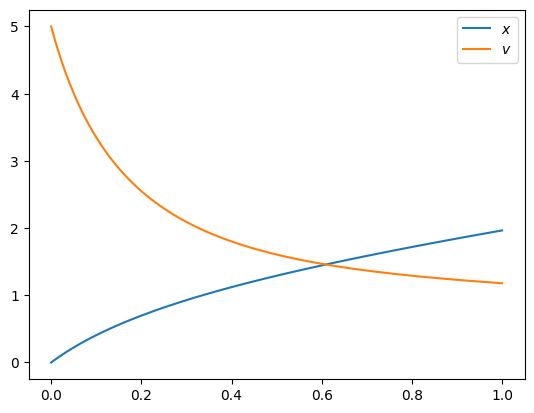

In [4]:
def dSdx(x, S):
    x, v = S
    return [v, -v**2 + np.sin(x)]

x0 = 0
v0 = 5
S0 = (x0, v0)

x = np.linspace(0, 1, 100)
second_order_sols = odeint(dSdx, y0 = S0, t = x, tfirst = True)

plt.plot(x, second_order_sols.T[0], label = '$x$')
plt.plot(x, second_order_sols.T[1], label = '$v$')
plt.legend()
plt.show()

The ODE for simple harmonic motion:

$$\ddot{x} = - \frac{k}{m} x(t)$$

$k$ is the spring constant, $m$ is the mass attached to the spring, and $x$ is the displacement of the spring which is a function of time.
 
 With an ansatz, which would either be $x(t) = A\cos(\omega t)$ or $x(t) = A\sin(\omega t)$, using chain rules to get the second-order derivative of $x(t)$ and then substituting $\frac{k}{m}$ results in:

$$\ddot{x} = - \omega ^2 x $$

where $\omega = \sqrt{\frac{k}{m}}$, the angular frequency. Like the previous problem, velocity is the derivative of displacement so we can derive another differential equation:

$$\dot{x} = v$$

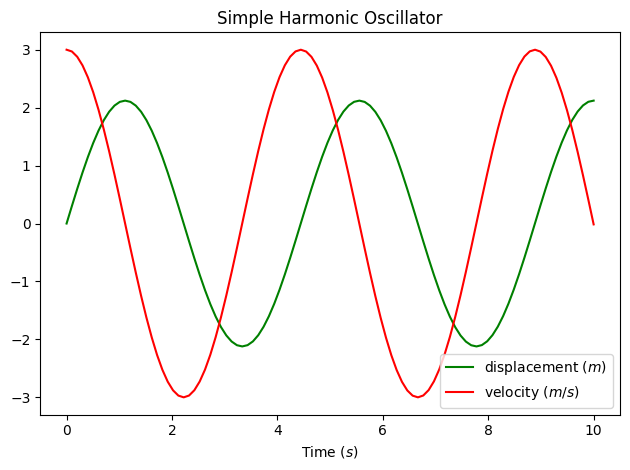

In [7]:
from scipy.integrate import odeint

k = 10 # N/m
m = 5 # kg
omega = np.sqrt(k/m)

def dSdt(t, S):
    x, v = S
    return [v, -(omega**2) * x]

t = np.linspace(0, 10, 100)

x0 = 0 # Initial displacement of 0 meters.
v0 = 3 # Initial velocity of 3 meters per second.
S0 = (x0, v0)

sols = odeint(dSdt, y0 = S0, t = t, tfirst = True)

plt.plot(t, sols.T[0], label = 'displacement $(m)$', color = 'green')
plt.plot(t, sols.T[1], label = 'velocity $(m/s)$', color = 'red')
plt.xlabel('Time $(s)$')
plt.title('Simple Harmonic Oscillator')
plt.tight_layout()
plt.legend()
plt.show()

# Fourier Transforms

Formula for the Discrete Fourier Transform (DFT) when working with data: 
$$\hat{x}_n = \sum_ {k=0}^{N-1} x_t e^{-2\pi ikn/N}$$

The operation tells us the discrete frequencies that make up a time series or a signal.

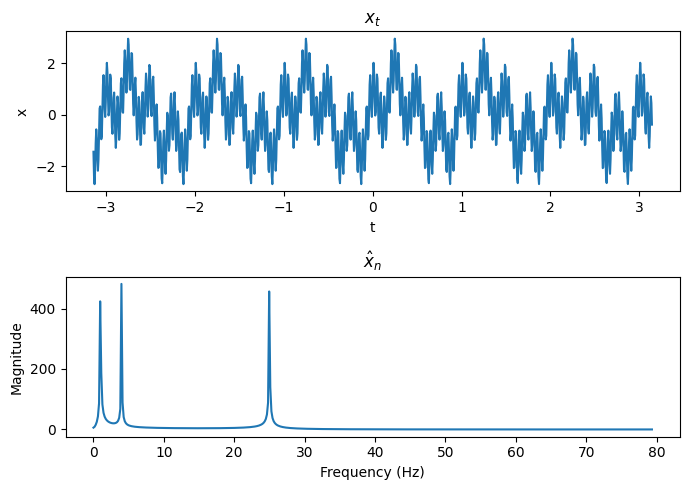

In [23]:
from scipy.fft import fft, fftfreq

t = np.linspace(-np.pi, np.pi, 1000)
x = np.sin(2*np.pi*t) + np.cos(8*np.pi*t) + np.sin(50*np.pi*t)
N = len(x)
y = fft(x)[:N//2] # x is an array. The [:N//2] removes the negative frequencies, takes one half. Returns an array.
f = fftfreq(N, np.diff(t)[0])[:N//2] # fftfreq(n, d) where n is basically the sample size and d is the sample spacing which np.diff does.

fig, axes = plt.subplots(2, 1, figsize = (7, 5))
ax = axes[0]
ax.plot(t, x)
ax.set_title('$x_t$')
ax.set_xlabel('t')
ax.set_ylabel('x')

ax = axes[1]
ax.plot(f, np.abs(y))
ax.set_title(r'$\hat{x}_n$')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')

plt.tight_layout()
plt.show()

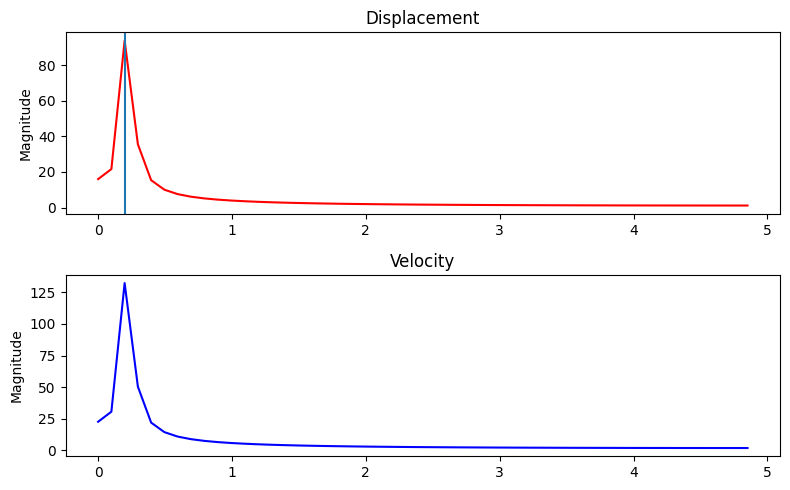

In [30]:
from scipy.fft import fft, fftfreq

fig, axes = plt.subplots(2, 1, figsize = (8, 5)) # For simple harmonic motion.
displacement = sols.T[0]
comp_nums1 = fft(displacement)[:len(displacement)//2]
freqs1 = fftfreq(len(displacement), np.diff(t)[0])[:len(displacement)//2]

ax = axes[0]
ax.plot(freqs1, np.abs(comp_nums1), color = 'red')
ax.axvline(0.198) # Angular frequency with greatest magnitude.
ax.set_title('Displacement')
ax.set_ylabel('Magnitude')

velocity = sols.T[1]
comp_nums2 = fft(velocity)[:len(velocity)//2]
freqs2 = fftfreq(len(velocity), np.diff(t)[0])[:len(velocity)//2]

ax = axes[1]
ax.plot(freqs2, np.abs(comp_nums2), color = 'blue')
ax.set_title('Velocity')
ax.set_ylabel('Magnitude')

plt.tight_layout()
plt.show()

In [33]:
import pandas as pd

df = pd.DataFrame({'Frequency (Hz)': freqs1, 'Magnitude': np.abs(comp_nums1)})

highestamps = df.sort_values('Magnitude', ascending = False)
resetted = highestamps.reset_index(drop = True)
resetted.iloc[:5]

,Frequency (Hz),Magnitude
0,0.198,93.709567
1,0.297,35.513177
2,0.099,21.590978
3,0.000,15.959043
4,0.396,15.356085


# Statistics

Calculating the mode of a dataset:

In [37]:
from scipy.stats import mode

data = np.array([9,7,2,7,5,4,3,6,7,8,5,4,2])

mode_res = mode(data)
print(f"Mode: {mode_res.mode}  Count: {mode_res.count}")

Mode: 7  Count: 3


Calculating the line of best fit with linear regression and the least squares method.

In [ ]:
from scipy.stats import linregress

x = [1,2,3,4,5,6,7,8,9]
y = [2,1,4,5,3,4,9,7,7]

lin_reg = linregress(x, y) # Returns an object called LinregressResult which contains info like the slope, intercept, correlation coefficient, etc.
line_of_best_fit = [lin_reg.slope * i + lin_reg.intercept for i in x] # List comprehension used to calculate y-values for plotting the regression line.

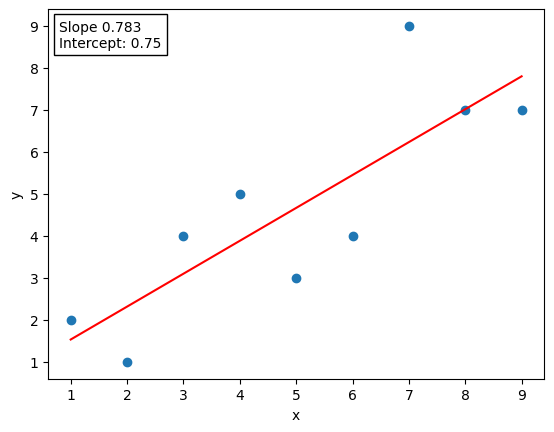

In [45]:
plt.scatter(x, y)
plt.plot(x, line_of_best_fit, color = 'red')
plt.text(0.8, 8.5, f"Slope {lin_reg.slope:.3f}\nIntercept: {lin_reg.intercept}", bbox = dict(facecolor = 'white', edgecolor = 'black'))
plt.xlabel('x')
plt.ylabel('y')
plt.show()